<a href="https://colab.research.google.com/github/TripopN/DADS6005-time-series-1st-assigment/blob/main/6610422011__Tripop_Netpu_1st_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1st Assignment - Moving Average & Simple Expo Smoothing

## Import library

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_squared_error


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import data and data exploratory.

In [3]:
sales = pd.read_excel('/content/drive/MyDrive/DADS6005/S12_44.xlsx', index_col='Month', parse_dates=True)

In [4]:
print(sales.shape)

(282, 1)


In [5]:
print(sales.info)

<bound method DataFrame.info of             Total Sales
Month                  
1992-01-01         1519
1992-02-01         1551
1992-03-01         1606
1992-04-01         1686
1992-05-01         1834
...                 ...
2015-02-01         3519
2015-03-01         3882
2015-04-01         3867
2015-05-01         4371
2015-06-01         4239

[282 rows x 1 columns]>


In [6]:
sales.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01'],
              dtype='datetime64[ns]', name='Month', length=282, freq=None)

In [7]:
print(sales.head())

            Total Sales
Month                  
1992-01-01         1519
1992-02-01         1551
1992-03-01         1606
1992-04-01         1686
1992-05-01         1834


<Axes: title={'center': 'Total Sales'}, xlabel='Month'>

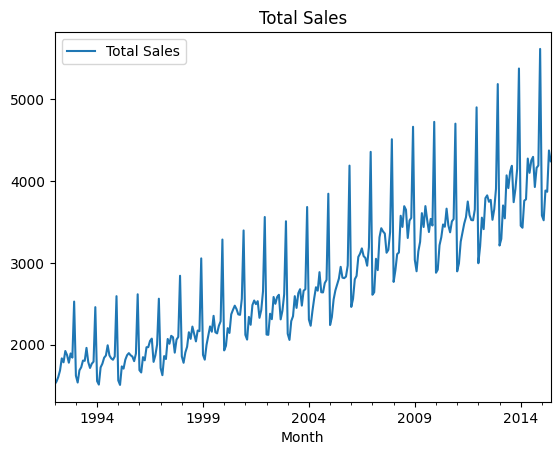

In [8]:
sales[['Total Sales']].plot(title = 'Total Sales')

In [9]:
print(sales.describe())

       Total Sales
count   282.000000
mean   2765.645390
std     838.227507
min    1510.000000
25%    2060.000000
50%    2616.500000
75%    3437.750000
max    5610.000000


In [10]:
print(len(sales))

282


## Decomposing the time series.

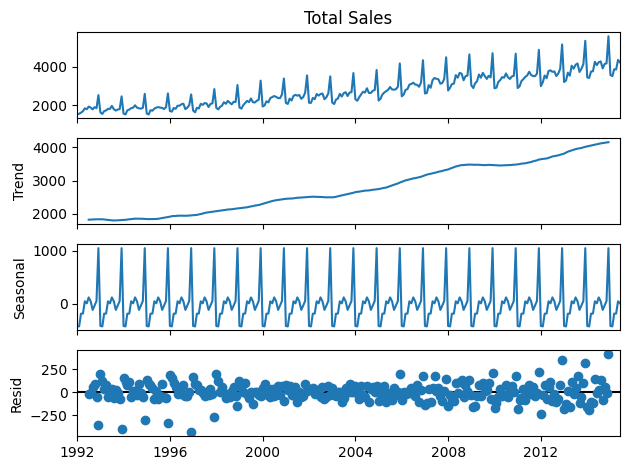

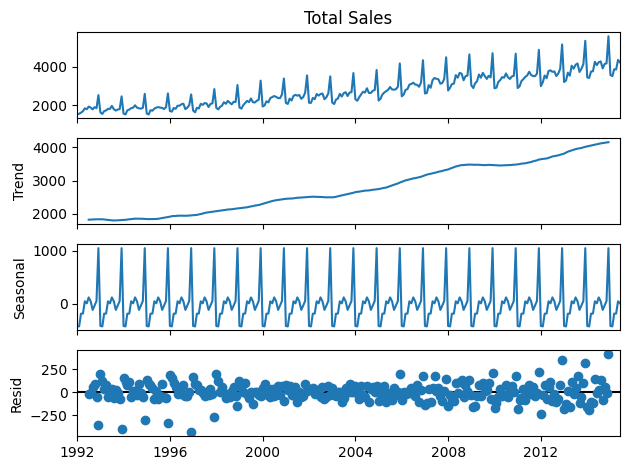

In [11]:
decompose_result = seasonal_decompose(sales['Total Sales'], model='add')
decompose_result.plot()

## Data spliting and Set the Datetime frequency to monthly level.

In [12]:
# Set the Datetime frequency to monthly level.
sales.index.freq = 'MS'
m=12
alpha = 1/(2*m)

In [13]:
# Define the split ratio for training (80%) and testing (20%)
train_size = int(len(sales) * 0.8)

# Split the data
train_data = sales[:train_size]
test_data = sales[train_size:]

print("Training data:\n", train_data)
print("\nTesting data:\n", test_data)

Training data:
             Total Sales
Month                  
1992-01-01         1519
1992-02-01         1551
1992-03-01         1606
1992-04-01         1686
1992-05-01         1834
...                 ...
2010-05-01         3468
2010-06-01         3440
2010-07-01         3661
2010-08-01         3459
2010-09-01         3372

[225 rows x 1 columns]

Testing data:
             Total Sales
Month                  
2010-10-01         3505
2010-11-01         3535
2010-12-01         4698
2011-01-01         2896
2011-02-01         2993
2011-03-01         3258
2011-04-01         3371
2011-05-01         3479
2011-06-01         3558
2011-07-01         3748
2011-08-01         3582
2011-09-01         3522
2011-10-01         3519
2011-11-01         3650
2011-12-01         4897
2012-01-01         2995
2012-02-01         3202
2012-03-01         3551
2012-04-01         3411
2012-05-01         3789
2012-06-01         3823
2012-07-01         3745
2012-08-01         3768
2012-09-01         3525
2012-10-

## Fitting, Prediction and model evaluation.

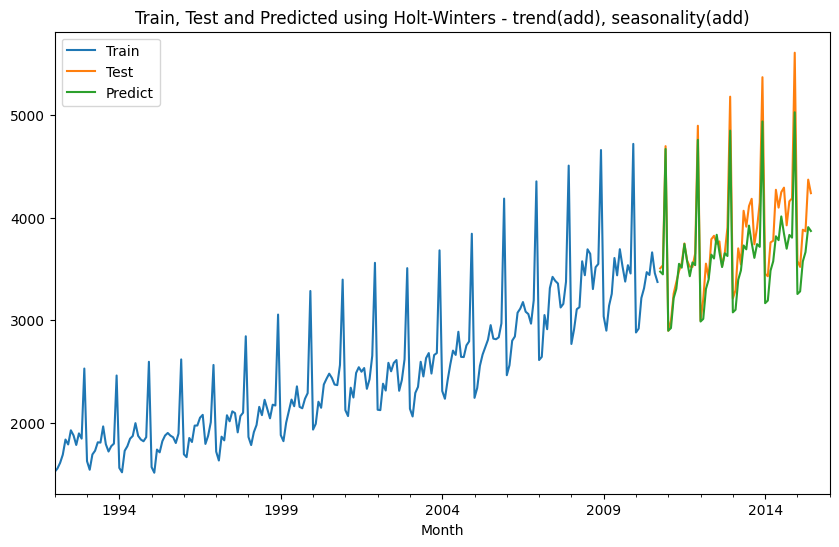

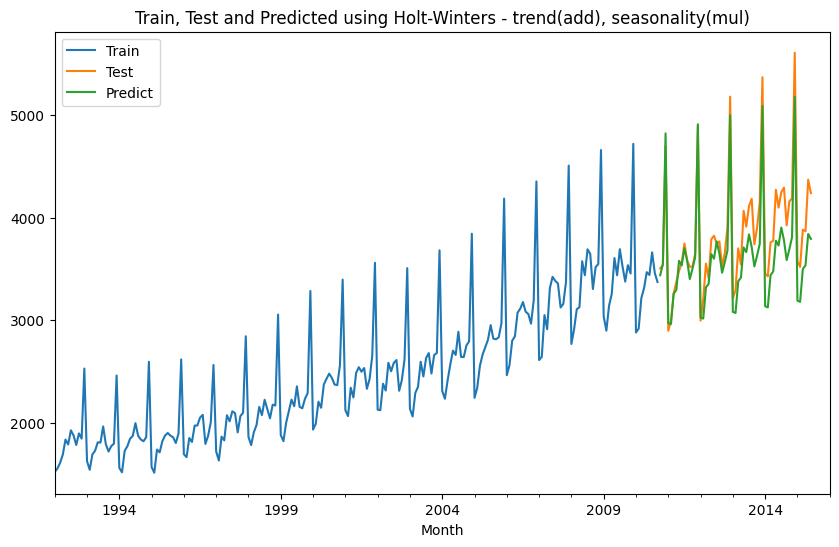

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


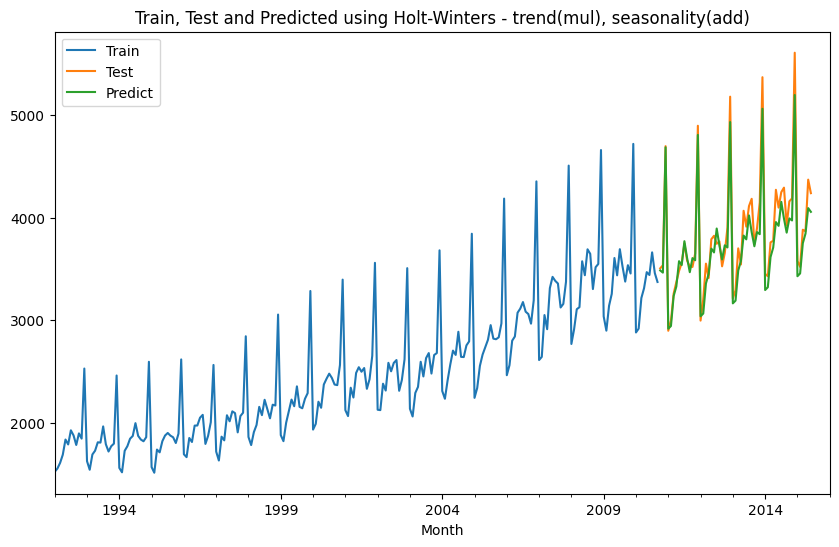

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


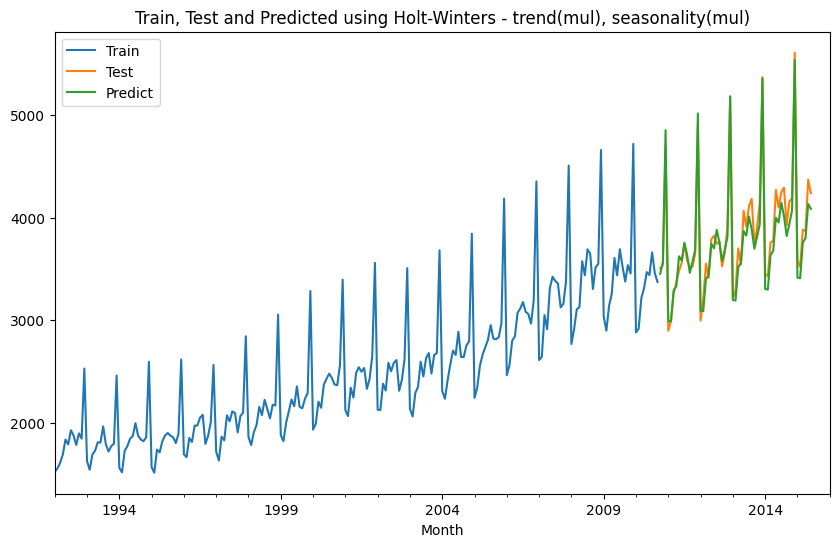

Model (trend=add, seasonal=add): MAE = 200.17, MSE = 61690.11
Model (trend=add, seasonal=mul): MAE = 222.19, MSE = 73579.47
Model (trend=mul, seasonal=add): MAE = 123.92, MSE = 24785.76
Model (trend=mul, seasonal=mul): MAE = 102.32, MSE = 15637.04


In [14]:
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define configurations for trend and seasonality
configs = [
    {'trend': 'add', 'seasonal': 'add'},
    {'trend': 'add', 'seasonal': 'mul'},
    {'trend': 'mul', 'seasonal': 'add'},
    {'trend': 'mul', 'seasonal': 'mul'}
]

# Initialize dictionary to store errors
results = {}

# Iterate through each configuration
for config in configs:
    # Fit the model
    fitted_model = ExponentialSmoothing(
        train_data['Total Sales'],
        trend=config['trend'],
        seasonal=config['seasonal'],
        seasonal_periods=12
    ).fit()

    # Forecast for the test period
    test_predictions = fitted_model.forecast(len(test_data))

    # Calculate forecast error
    mae = mean_absolute_error(test_data['Total Sales'], test_predictions)
    mse = mean_squared_error(test_data['Total Sales'], test_predictions)

    # Store results
    results[(config['trend'], config['seasonal'])] = {'MAE': mae, 'MSE': mse}

    # Plot train, test, and forecast for visual comparison
    plt.figure(figsize=(10, 6))
    train_data['Total Sales'].plot(legend=True, label='Train')
    test_data['Total Sales'].plot(legend=True, label='Test')
    test_predictions.plot(legend=True, label='Predict', xlim=['1992-01-01','2016-01-01'])
    plt.title(f"Train, Test and Predicted using Holt-Winters - trend({config['trend']}), seasonality({config['seasonal']})")
    plt.show()

# Print results for comparison
for key, error in results.items():
    print(f"Model (trend={key[0]}, seasonal={key[1]}): MAE = {error['MAE']:.2f}, MSE = {error['MSE']:.2f}")


## Conclusion.

The model with multiplicative trend and multiplicative seasonality (trend=mul, seasonal=mul) provides the best forecast for your data, as it has the lowest MAE (102.32) and MSE (15637.04). This suggests that both the trend and seasonal components of your data are better represented by a multiplicative approach, which may capture variations in both trend and seasonality more effectively. This model would be the best choice based on your forecast accuracy criteria.